# Project High Value Customer Recognition

# Table of Contents
1. [Project Overview](#project-overview)
2. [Data Creation and Initial Inspection](#data-creation-and-initial-inspection)
3. [Data Cleaning](#data-cleaning)
4. [EDA](#eda)
5. [Feature Engineering](#feature-engineering)
6. [Model Building](#model-building)
7. [Conclusion](#conclusion)

# Project Overview <a id='Project-Overview'></a>
- Overview:
High value customer recognition is a recognition tool for sales person who want to quickly identify which customer they should prioritize to spend more their valuable time to cutivate or provide a better servise which could lead to better sales performance. 
- Goal: 
Ranking all the customers based on the value they provided over the years. 


# Data Creation and Initial Inspection
my desire data is just like I deld with in my previous job, since I could not found it online, so I created myself. 

In [13]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
'''
# Seed for reproducibility
np.random.seed(0)

# Define constants
num_rows = 50000
years = [2018, 2019, 2020, 2021, 2022, 2023]
states = ['CA', 'TX', 'NY', 'FL', 'IL', 'PA', 'OH', 'GA', 'NC', 'MI']
industries = [
    'Tech', 'Industrial Automation', 'Appliance Brands', 'Gaming Peripherals', 'Utilities and Infrastructure', 
    'Tools Company', 'Networking', 'Laptop', 'Consumer'
]
sales_reps = ['Oscar', 'Paul', 'Emma', 'Steven', 'Julie']
product_serials = [f"SN{str(i).zfill(4)}" for i in range(1, 31)]

# Define a list of real company names for each industry
real_company_names = {
    'Tech': ['Google', 'Amazon', 'Apple', 'Microsoft', 'Meta'],
    'Industrial Automation': ['Rockwell Automation', 'Siemens', 'ABB', 'Honeywell', 'Schneider Electric'],
    'Appliance Brands': ['Whirlpool', 'GE Appliances', 'Bosch', 'Samsung Electronics', 'LG'],
    'Gaming Peripherals': ['Razer', 'Corsair', 'HyperX', 'SteelSeries', 'Logitech'],
    'Utilities and Infrastructure': ['Badger Meter', 'Sensu', 'Aclara', 'Sensus', 'Landis+Gyr'],
    'Tools Company': ['Milwaukee Tool', 'DeWalt', 'Makita', 'Stanley', 'Bosch Power Tools'],
    'Networking': ['Cisco', 'Juniper Networks', 'Arista Networks', 'HPE', 'Huawei'],
    'Laptop': ['Dell', 'HP', 'Lenovo', 'Asus', 'Acer'],
    'Consumer': ['Sony', 'Panasonic', 'Philips', 'Sharp', 'Toshiba']
}

# Helper functions
def generate_full_date(year):
    """Generates a random full date in the specified year, excluding weekends."""
    start_date = datetime(year, 1, 1)
    end_date = datetime(year, 12, 31)
    random_date = start_date + timedelta(days=random.randint(0, (end_date - start_date).days))
    while random_date.weekday() >= 5:  # Exclude weekends
        random_date = start_date + timedelta(days=random.randint(0, (end_date - start_date).days))
    return random_date

def assign_real_company_name(industry):
    """Assign a random real company name based on the given industry."""
    return np.random.choice(real_company_names[industry])

# Generate the data
data = {
    'Date': [generate_full_date(year) for year in np.random.choice(years, num_rows)],
    'Customer': [assign_real_company_name(industry) for industry in np.random.choice(industries, num_rows)],
    'Industry': np.random.choice(industries, num_rows),
    'State': np.random.choice(states, num_rows),
    'Product_Name': np.random.choice(product_serials, num_rows),
    'Purchased (in thousands)': np.random.randint(4, 20000, num_rows),
    'Price (single piece)': np.round(np.random.uniform(0.005, 1.0, num_rows), 4),
    'Sales_Rep': np.random.choice(sales_reps, num_rows)
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate Revenue as Purchased * Price, and round to 2 decimals
df['Revenue'] = np.round(df['Purchased (in thousands)'] * 1000 * df['Price (single piece)'], 2)

# Assign Last_Purchase_Date and Days_Since_Last_Purchase
df['Last_Purchase_Date'] = [generate_full_date(year) for year in df['Date'].dt.year]
df['Days_Since_Last_Purchase'] = (datetime.now() - pd.to_datetime(df['Last_Purchase_Date'])).dt.days

# Export to CSV
df.to_csv('sales.csv', index=False)
print("CSV file 'sales.csv' created successfully.")
'''

### Initial Data Inspection

By using `describe()` and `info()`, we quickly gain an overview of the data's structure and distribution. Key insights:
- **Purchased (in thousands)** and **Price (single piece)** show a broad range, but there are no extreme values that suggest significant outliers.
- **Revenue** also appears to be reasonably distributed given the range and standard deviation.
- The columns **Customer**, **Industry**, **State**, and **Sales_Rep** have multiple unique values, showing that the data includes diverse customer and product information.
- **Data Type** are corrected.

Based on this summary, the data seems well-prepared for further analysis without immediate concerns about outliers.


In [ ]:
df = pd.read_csv('US_Sales_data.csv')
df.describe(include='all')

,Date,Customer,Industry,State,Product_Name,Purchased (in thousands),Price (single piece),Sales_Rep,Revenue,Last_Purchase_Date,Days_Since_Last_Purchase
count,50000,50000,50000,50000,50000,50000.000000,50000.000000,50000,5.000000e+04,50000,50000.000000
unique,1565,45,9,10,30,NaN,NaN,5,NaN,1565,NaN
top,2021-07-20,Aclara,Laptop,PA,SN0029,NaN,NaN,Oscar,NaN,2020-05-19,NaN
freq,55,1176,5713,5141,1742,NaN,NaN,10083,NaN,52,NaN
mean,NaN,NaN,NaN,NaN,NaN,10032.667700,0.499856,NaN,5.029709e+06,NaN,1403.641420
std,NaN,NaN,NaN,NaN,NaN,5777.684164,0.287594,NaN,4.418383e+06,NaN,632.359077
min,NaN,NaN,NaN,NaN,NaN,5.000000,0.005100,NaN,2.024000e+02,NaN,316.000000
25%,NaN,NaN,NaN,NaN,NaN,5042.000000,0.249000,NaN,1.380629e+06,NaN,856.000000
50%,NaN,NaN,NaN,NaN,NaN,10007.000000,0.498900,NaN,3.759436e+06,NaN,1398.000000
75%,NaN,NaN,NaN,NaN,NaN,15072.000000,0.748700,NaN,7.662991e+06,NaN,1955.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      50000 non-null  object 
 1   Customer                  50000 non-null  object 
 2   Industry                  50000 non-null  object 
 3   State                     50000 non-null  object 
 4   Product_Name              50000 non-null  object 
 5   Purchased (in thousands)  50000 non-null  int64  
 6   Price (single piece)      50000 non-null  float64
 7   Sales_Rep                 50000 non-null  object 
 8   Revenue                   50000 non-null  float64
 9   Last_Purchase_Date        50000 non-null  object 
 10  Days_Since_Last_Purchase  50000 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 4.2+ MB


# Data Cleaning
By using `msno`, we can quickly visually inspect the missting value of each columns.<br>
I also quickly inspect whether there is any duplicated data.  

<Axes: >

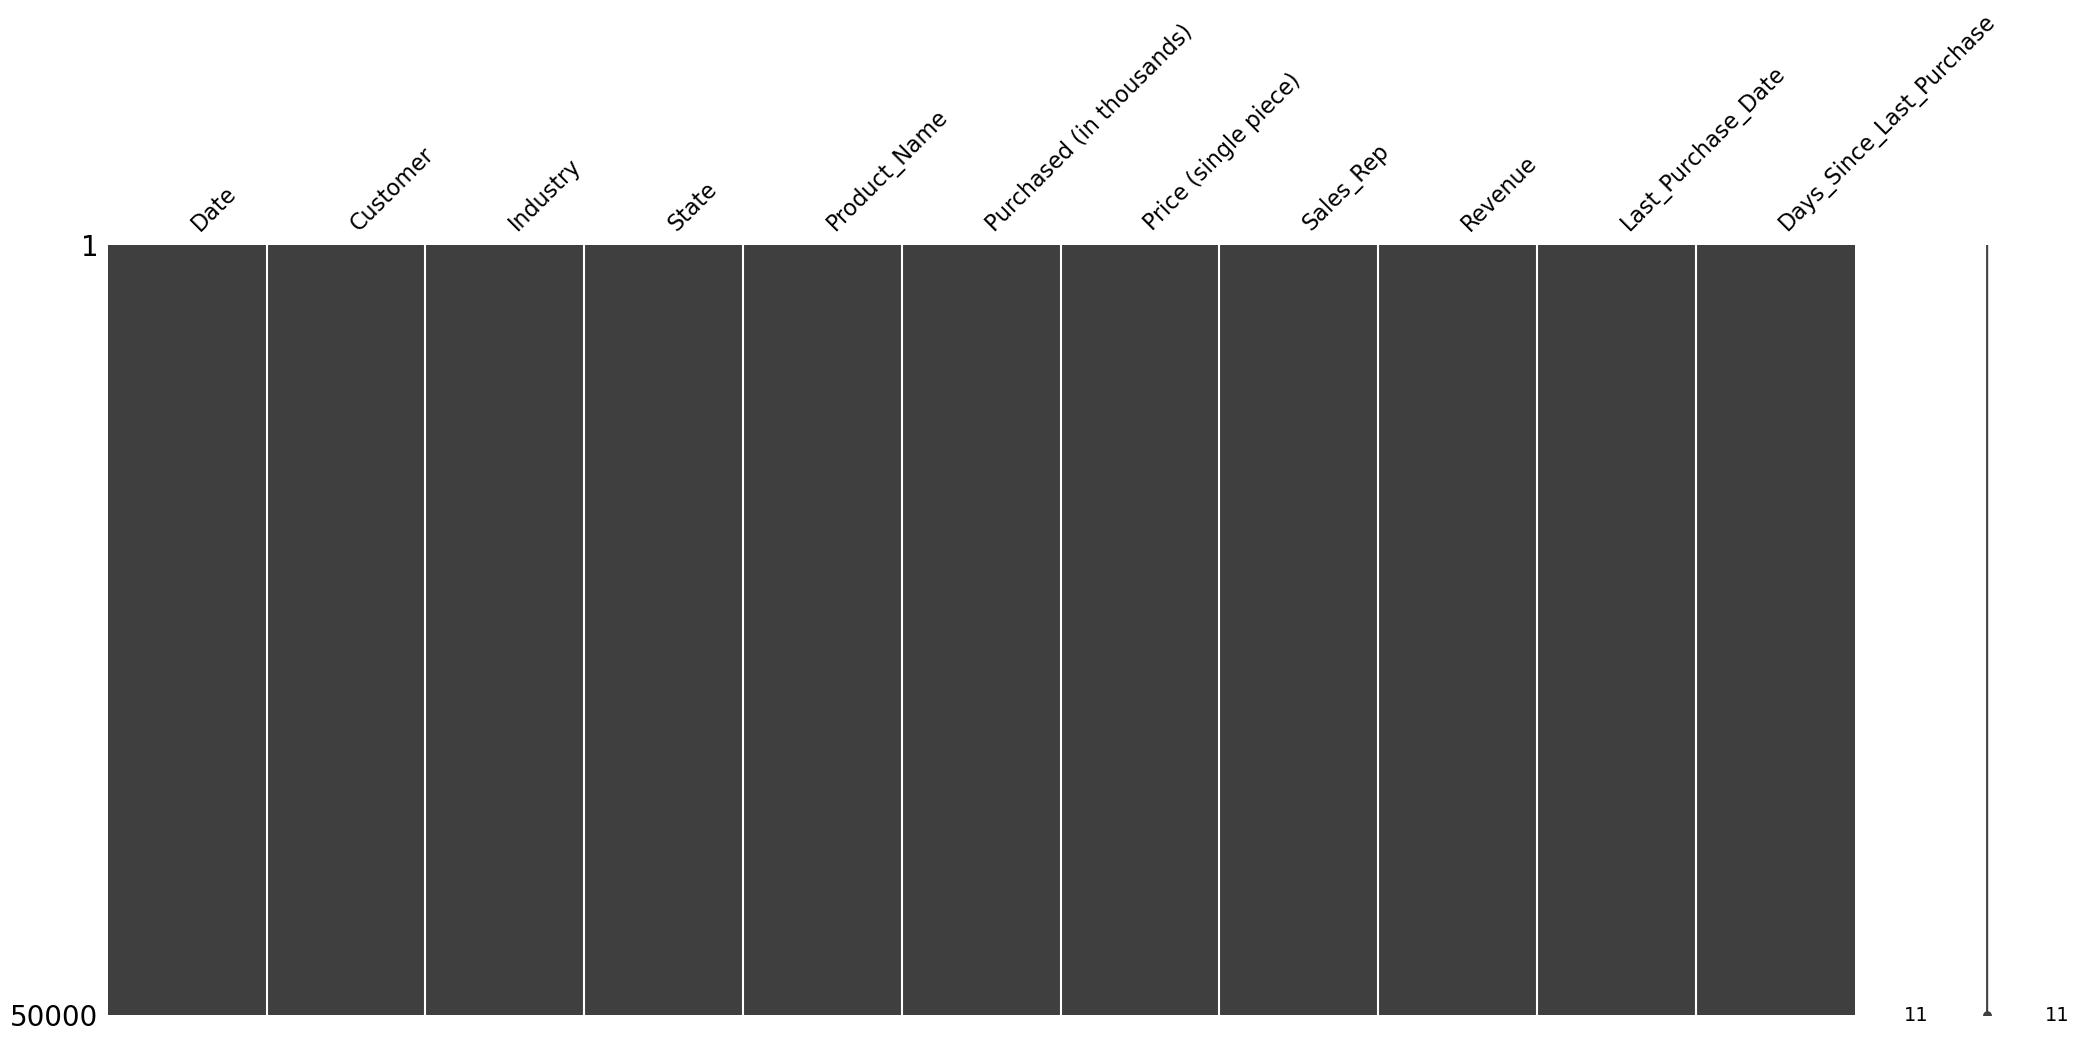

In [17]:
import missingno as msno   
msno.matrix(df)

As the matrix present, there is not missing value. <br> 
duplication?

In [18]:
df.duplicated().sum()

0

# EDA

### Numerical
- **Revenue Distribution**: The higher frequency of lower revenue values suggestat that the majority of customers contribute smaller amounts. This skew indicates a larger base of low-revenue clients. 
- **Purchased Quantity & Days Since Last Purchase**: The consistent distribution in purchase quantity and days since the last purchase suggest steady purchasing behavior across time. It could be beneficial in predicting future purchsing behavior, as it implies a stable customer base. 
### Categorical 
- **Customer & Industry Distributions**: The even distribution acroos customers is promising, siggesting a balanced dataset. However, the Laptop industry stands out with the highest sales count, potentially indicating higher demand or value in this segment. This insight could be valuable for targeting efforts if hgih-value customer are more likely to be found in Laptop industry. 
- **States & Sales Rep**: The similar sales counts amount sales reps imply uniform performance. However, Oscar's slightly higher sales count could indicate eirhter a higher-performing territory (PA or NC), potentially indicating higher demand or value in this segment.  
### Date
- **Daily Revenue**: Daily revenue it too difficurlt to interpret. 
- **Monthly Revenue**: MArch stand out with the highest revenue, while Februrary is the lowest. This seasonality might reflect budgetting cycles or demand, is can use for model to prioritize engagement efforts during high-activity months.
### Relationships
- **Purchased vs. Revenue**: Positive correlation here confirms that larget purchaes quantities typically lead to higher revenue. The relationship is intiutive that purcahse quantity could ba a strong predictor for identifying high-value customers. 
- **Price vs. Revenue**: Higher prices per unit are associated with higher revenue, it suggesting that high-value customer may be willing to pay more per price. Price sensitivity could therefore be a distinguishing factor in identifying premium customer.
- **Industry & State vs. Revenue**: These two have no significant variation of revenue through out the industries and states, the difference is insignificant.  
- **Sales Rep vs. Revenue**: Variability in revenue among sales reps could indicate differences in client portfolios, with some rep handing specific industry.
- **Days Since Last Purchase vs. Revenue**: The lack of clear trend suggest that revenue is not strongly affected by the time since the last purchase. However, from domain knowledge, I know that some of the client tend to purchase more frequently with lower quantity and some wiht high quantity but onyl purchase few time a year.
- **Customer & Product vs. Revenue**: VAriation in revenue acroos customer and products highlightin that certain clients and product ar emore profitable. Identifying patterns in these segment oculd strengthen the model by pinpointing high-value customer based on specific products or client history. 

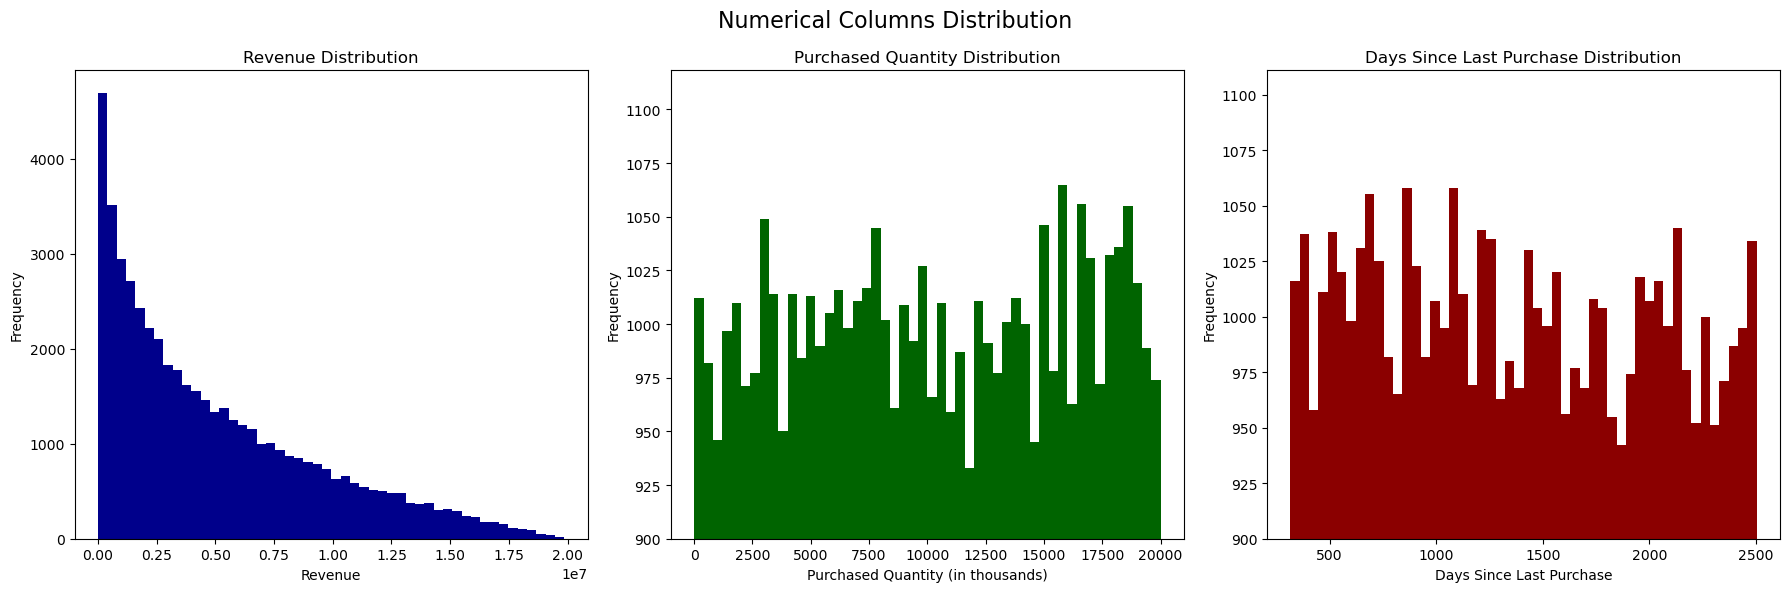

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Numerical - Revenue
df['Revenue'].plot(kind='hist', bins=50, title='Revenue Distribution', ax=axes[0], color='darkblue')
axes[0].set_xlabel('Revenue')

# Numerical - Purchased Quantity
df['Purchased (in thousands)'].plot(kind='hist', bins=50, title='Purchased Quantity Distribution', ax=axes[1], color='darkgreen')
axes[1].set_xlabel('Purchased Quantity (in thousands)')
axes[1].set_ylim(900)

# Numerical - Days Since Last Purchase
df['Days_Since_Last_Purchase'].plot(kind='hist', bins=50, title='Days Since Last Purchase Distribution', ax=axes[2], color='darkred')
axes[2].set_xlabel('Days Since Last Purchase')
axes[2].set_ylim(900)

# Add a title to the entire figure
fig.suptitle('Numerical Columns Distribution', fontsize=16)

plt.tight_layout()
plt.show()


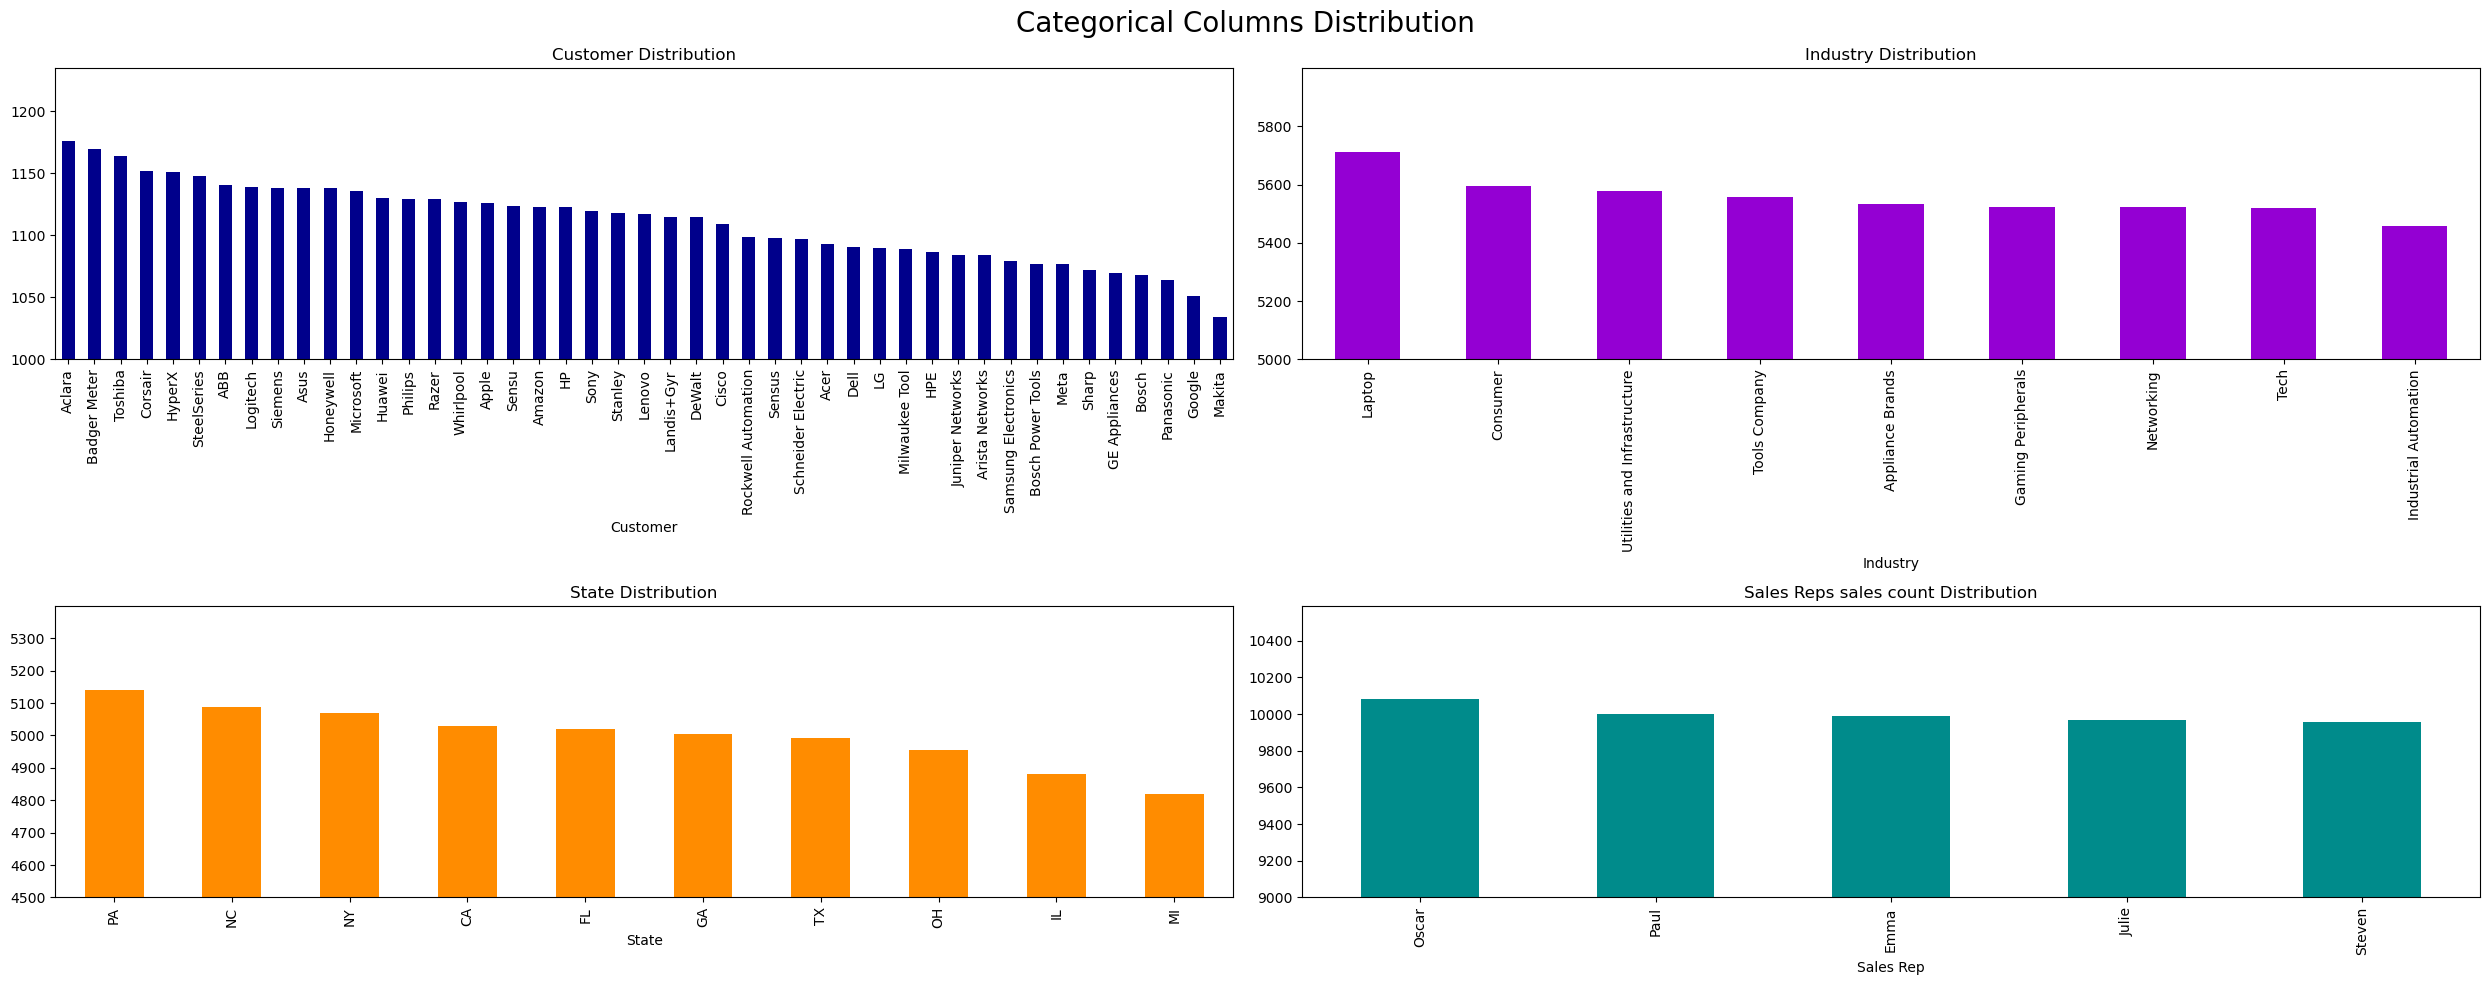

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(25, 10))

#Category - Customer

df['Customer'].value_counts().plot(kind='bar', title='Customer Distribution', ax=axes[0,0], color='darkblue')
axes[0,0].set_ylim(1000)

# Category - Industry
df['Industry'].value_counts().plot(kind='bar', title='Industry Distribution', ax=axes[0,1], color='darkviolet')
axes[0,1].set_ylim(5000)

# Category - State
df['State'].value_counts().plot(kind='bar', title='State Distribution', ax=axes[1,0], color='darkorange')
axes[1,0].set_xlabel('State')
axes[1,0].set_ylim(4500)

# Category - Sales Rep sales counts.
df['Sales_Rep'].value_counts().plot(kind='bar', title='Sales Reps sales count Distribution', ax=axes[1,1], color='darkcyan')
axes[1,1].set_xlabel('Sales Rep')
axes[1,1].set_ylim(9000)

fig.suptitle('Categorical Columns Distribution', fontsize=20)

plt.tight_layout()
plt.show()

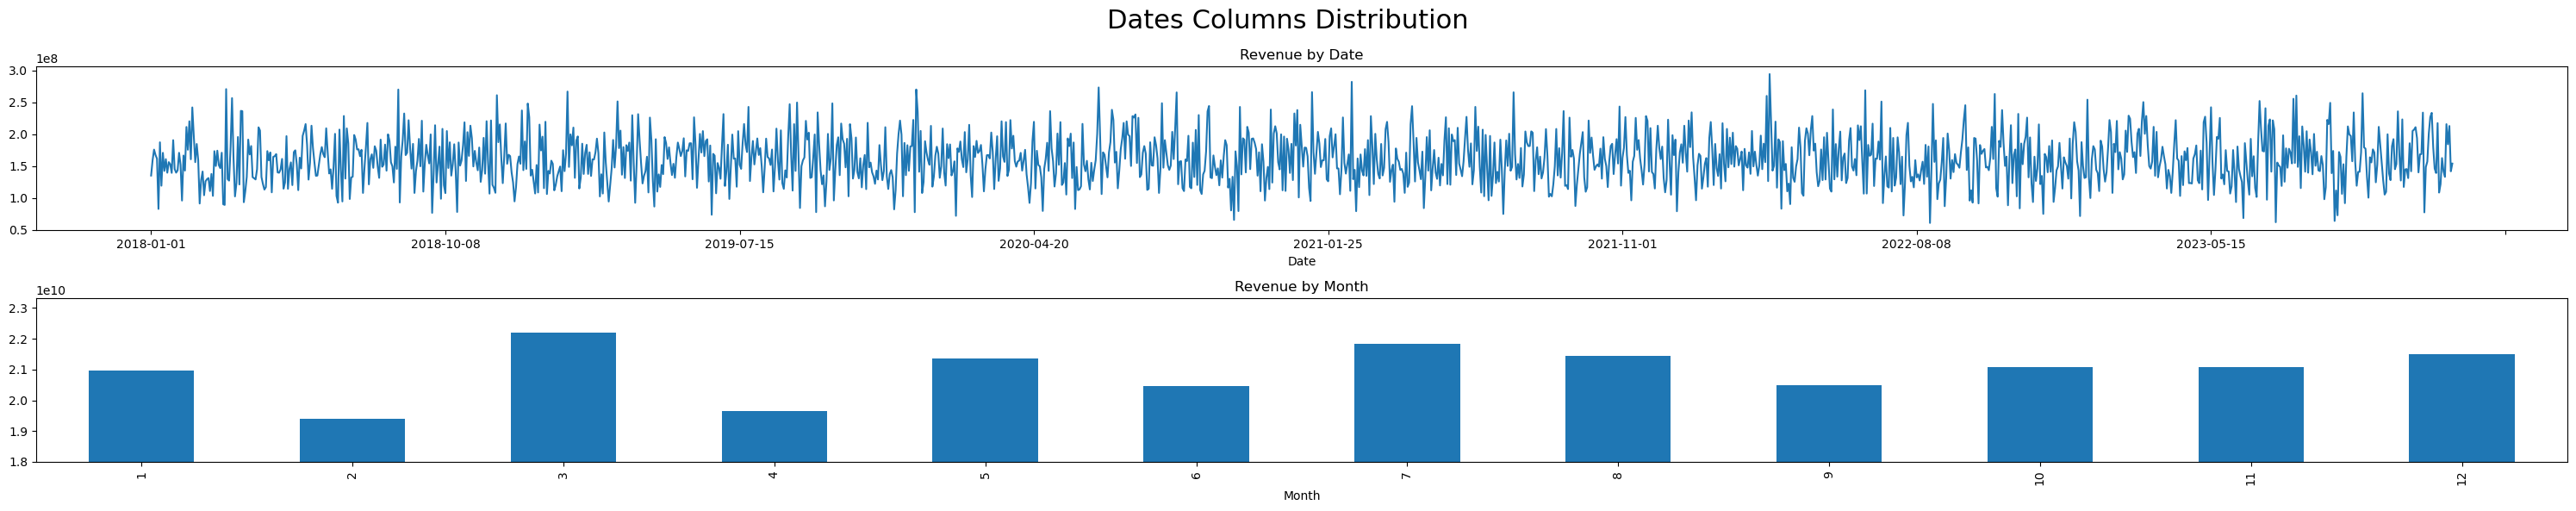

In [22]:
fig, axes = plt.subplots(2, 1, figsize=(30, 6))

# Datetime - Date
df.groupby('Date')['Revenue'].sum().plot(title='Revenue by Date', ax=axes[0])
# too noisy

df['Date'] = pd.to_datetime(df['Date']) 
df['Month'] = df['Date'].dt.month

df.groupby('Month')['Revenue'].sum().plot(kind='bar', title='Revenue by Month', ax=axes[1])
axes[1].set_ylim(18000000000)

fig.suptitle('Dates Columns Distribution', fontsize=22)
plt.tight_layout()
plt.show()  

C:\Users\oscar\AppData\Local\Temp\ipykernel_204820\3992600377.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[3, 0].set_xticklabels(axes[3, 0].get_xticklabels(), rotation=60)


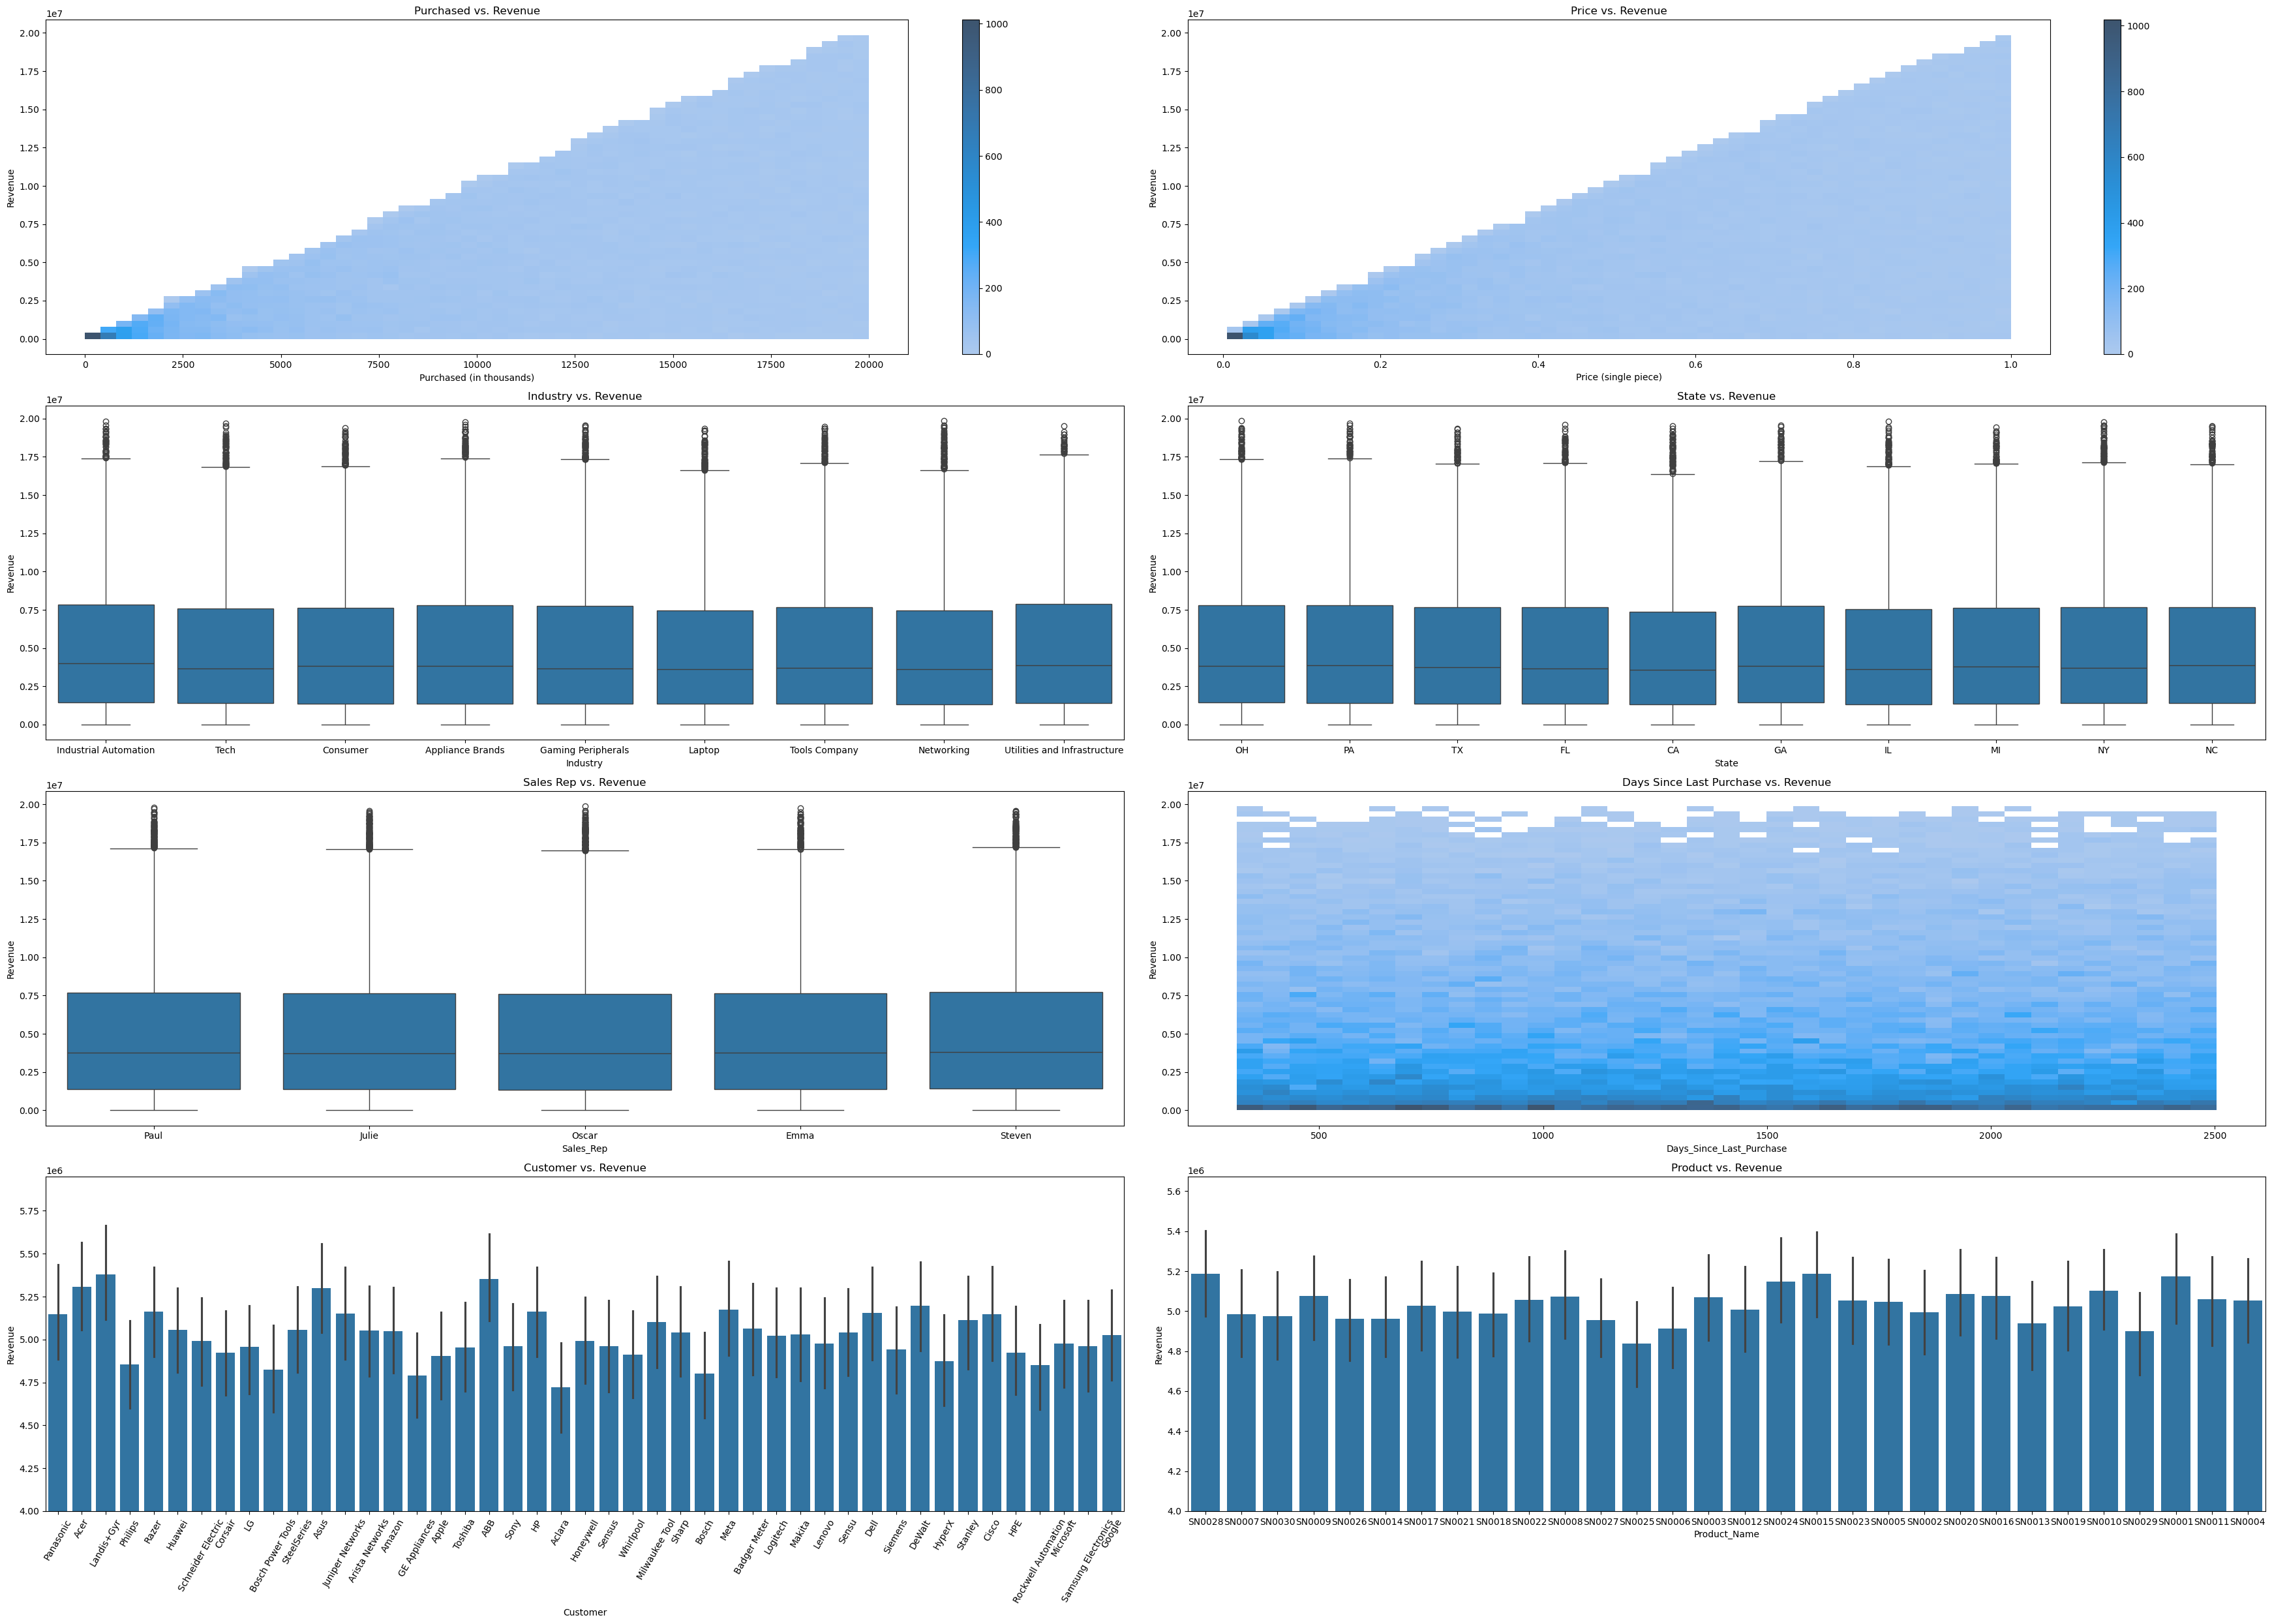

In [68]:
# Relationships 

fig, axes = plt.subplots(4, 2, figsize=(35, 25))

# Purchase vs. Revenue 
sns.histplot(data=df, x='Purchased (in thousands)', y='Revenue', bins=50, cbar=True, ax=axes[0, 0])    
axes[0, 0].set_title('Purchased vs. Revenue')

# Price vs. Revenue
sns.histplot(data=df, x='Price (single piece)', y='Revenue', bins=50, cbar=True, ax=axes[0, 1])
axes[0, 1].set_title('Price vs. Revenue')

# Industry vs. Revenue
sns.boxplot(data=df, x='Industry', y='Revenue', ax=axes[1, 0])
axes[1, 0].set_title('Industry vs. Revenue')

# State vs. Revenue
sns.boxplot(data=df, x='State', y='Revenue', ax=axes[1, 1])
axes[1, 1].set_title('State vs. Revenue')

# Sales Rep vs. Revenue
sns.boxplot(data=df, x='Sales_Rep', y='Revenue', ax=axes[2, 0]) 
axes[2, 0].set_title('Sales Rep vs. Revenue')

# Days Since Last Purchase vs. Revenue
sns.histplot(data=df, x='Days_Since_Last_Purchase', y='Revenue', ax=axes[2, 1])
axes[2, 1].set_title('Days Since Last Purchase vs. Revenue')

# Customer vs. Revenue
sns.barplot(data=df, x='Customer', y='Revenue', ax=axes[3, 0])
axes[3, 0].set_title('Customer vs. Revenue')
axes[3, 0].set_xticklabels(axes[3, 0].get_xticklabels(), rotation=60)
axes[3, 0].set_ylim(4000000)

# Products vs. Revenue
sns.barplot(data=df, x='Product_Name', y='Revenue', ax=axes[3, 1])
axes[3, 1].set_title('Product vs. Revenue')
axes[3, 1].set_ylim(4000000)

plt.tight_layout()
plt.show()

# Feature Engineering
Before we start building the model, we need to define our target variable and preprocess our data.

- **Target Definition**: We want to classify customers based on their purchase history into high-value, normal, and low-value categories. I labeled them as follows: the top 20% of customers by revenue are labeled as high-value (2), the middle 60% as normal (1), and the bottom 20% as low-value (0). This classification serves as the target variable for our model, which aims to predict these three classes.

- **Data Splitting**: Split the dataset into training and testing sets to evaluate the model’s performance on unseen data.

- **Encoding and Scaling**:
    - **Encoding**: Convert categorical variables into numerical form so they can be used in machine learning models.
    - **Scaling**: Scale numerical features to ensure each feature contributes proportionately to the model. For instance, "Purchased (in thousands)" may have a significantly larger range of values than "Price (single piece)." Without scaling, models that rely on distance measurements (such as KNN, SVM) may be heavily influenced by features with larger numerical ranges.
- **Feature Selection**: Identify and retain the most relevant features for predicting high-value customers. This step helps simplify the model, improve its performance, and reduce the risk of overfitting.

In [ ]:
high_value = df['Revenue'].quantile(0.8)
low_value = df['Revenue'].quantile(0.2)

def label_value(row):
    if row['Revenue'] >= high_value:
        return 2
    if row['Revenue'] <= low_value:
        return 0
    else:
        return 1
    
df['Customer_Value'] = df.apply(label_value, axis=1)

df['Customer_Value'].value_counts()

df.to_csv('sales_labeled.csv', index=False)

# Data Splitting
from sklearn.model_selection import train_test_split

x= df.drop(columns=['Revenue'])
y= df['Customer_Value']

X_train, X_test , y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Encoding categorical data 
X_train = pd.get_dummies(X_train, columns=['Industry', 'State', 'Sales_Rep'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Industry', 'State', 'Sales_Rep'], drop_first=True)

# Scalling Numerical Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['Purchased (in thousands)', 'Price (single piece)', 'Days_Since_Last_Purchase']

X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

#Feature Selection
selected_fetaures = ['Purchased (in thousands)', 'Price (single piece)', 'Days_Since_Last_Purchase', 'Industry_Consumer', 'Industry_Gaming Peripherals', 'Industry_Industrial Automation', 'Industry_Laptop', 'Industry_Networking', 'Industry_Tech', 'Industry_Tools Company', 'Industry_Utilities and Infrastructure', 'State_FL', 'State_GA', 'State_IL', 'State_MI', 'State_NC', 'State_NY', 'State_OH', 'State_TX', 'Sales_Rep_Julie', 'Sales_Rep_Oscar', 'Sales_Rep_Paul', 'Sales_Rep_Steven']

X_train = X_train[selected_fetaures]
X_test = X_test[selected_fetaures]

# Model building 

- **Basesline Model**: We initially tested multiple models, including Linear Regression, Random Forest, XGBoost, and SVM, evaluating each with accuracy and training time efficiency. Based on the results, Random Forest (RF) and SVM (SVC) had the highest accuracy, so I decided to tune both models to determine which would perform better.
- **Model Tunning**: After tuning, the Random Forest model achieved both lower training time and higher accuracy compared to SVM, making it a strong candidate for the final model.
- **Final Model** 
    - **Feature Importance**: Analyzed feature importance to identify which features most significantly influence the model’s predictions.
    - **Build Simplified Model**: Constructed a simplified model using only the key features identified, then compared its performance to the full model.
- **Deployment**: Saved the final model and created a Python script to run it on new data. This script also generates a histogram to rank customer priority scores.

#### Note:
**Later identified that the tuned Random Forest model had very high accuracy, indicating overfitting. Therefore, I opted to use the untuned RF model instead for better generalization.**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from sklearn.svm import SVC
import time

# Initialize models
log_reg = LinearRegression()
RF = RandomForestClassifier()
XGB = XGBRegressor()
SVC = SVC()

# Measure and print run time for each model
start_time = time.time()
log_reg.fit(X_train, y_train)
print(f"Linear Regression training time: {time.time() - start_time} seconds")

start_time = time.time()
RF.fit(X_train, y_train)
print(f"Random Forest training time: {time.time() - start_time} seconds")

start_time = time.time()
XGB.fit(X_train, y_train)
print(f"XGBoost training time: {time.time() - start_time} seconds")

start_time = time.time()
SVC.fit(X_train, y_train)
print(f"SVC training time: {time.time() - start_time} seconds")

# Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}


# Presenting results in matrix form
models = [log_reg, RF, XGB, SVC]
model_names = ['Logistic Regression', 'Random Forest', 'XGBoost', 'SVC']

results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

for model, name in zip(models, model_names):
    evaluation = evaluate_model(model, X_test, y_test)
    results['Model'].append(name)
    results['Accuracy'].append(evaluation['Accuracy'])
    results['Precision'].append(evaluation['Precision'])
    results['Recall'].append(evaluation['Recall'])
    results['F1 Score'].append(evaluation['F1 Score'])

models_performance = pd.DataFrame(results)
print(models_performance)


Linear Regression training time: 0.031145334243774414 seconds
Random Forest training time: 4.703787326812744 seconds
XGBoost training time: 0.3858215808868408 seconds
SVC training time: 18.006118059158325 seconds


- precision = TP/TP+FP -> proportion of correctly predicted positive instance (high value customer)
- recall TP/FP+FN -> proportion of correctly predicted positive instance out of all actual positive instance.
- F1 Scre = 2 * (Precisoin*Recall / Precision+Recall) -> harmonic mean of precision and recall, balancing both metric.

**SVM have the highest overall score, but SVC is relatively computationally expensive, if we increase the dataset, it may take a long time to train, so we should also tune RF which is a mor escalable algorithm** <br>
RF - 4 seconds<br>
SVM 16 seconds <br>
-> Tunning both model.

## Model Tunning

In [ ]:
'''
from sklearn.model_selection import RandomizedSearchCV

param_grid_rf = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None ],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
} 

param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'linear']
}  

rf_random_search = RandomizedSearchCV(
    estimator=RF,
    param_distributions=param_grid_rf,
    n_iter=10,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1   
)

svm_random_search = RandomizedSearchCV(
    estimator=SVC,
    param_distributions=param_grid_svm,
    n_iter=10,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1   
)

rf_random_search.fit(X_train, y_train)
svm_random_search.fit(X_train, y_train)

print("Best parameter for Random Forest: ", rf_random_search.best_params_)
best_rf = rf_random_search.best_estimator_
print("Best parameter for SVM: ", svm_random_search.best_params_)
best_svm = svm_random_search.best_estimator_

'''

best_rf = RandomForestClassifier(n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=None, max_depth=None)

Hyperparameter results:<br>
Best parameter for Random Forest:  {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': None}<br>
Best parameter for SVM:  {'kernel': 'rbf', 'gamma': 0.1, 'C': 10}

In [35]:
rf_results = evaluate_model(best_rf, X_test, y_test)
svm_results = evaluate_model(best_svm, X_test, y_test)

print("Tuned Radom Forest Result:", rf_results)
print("Tuned SVM Result:", svm_results)


Tuned Radom Forest Result: {'Accuracy': 0.9945, 'Precision': 0.9945099891036232, 'Recall': 0.9945, 'F1 Score': 0.9945025023944054}
Tuned SVM Result: {'Accuracy': 0.9882, 'Precision': 0.9882096163062213, 'Recall': 0.9882, 'F1 Score': 0.9882019228280112}


As the result present, Random Forest have less training time and higher accuracy. 

## Feature Importance. 

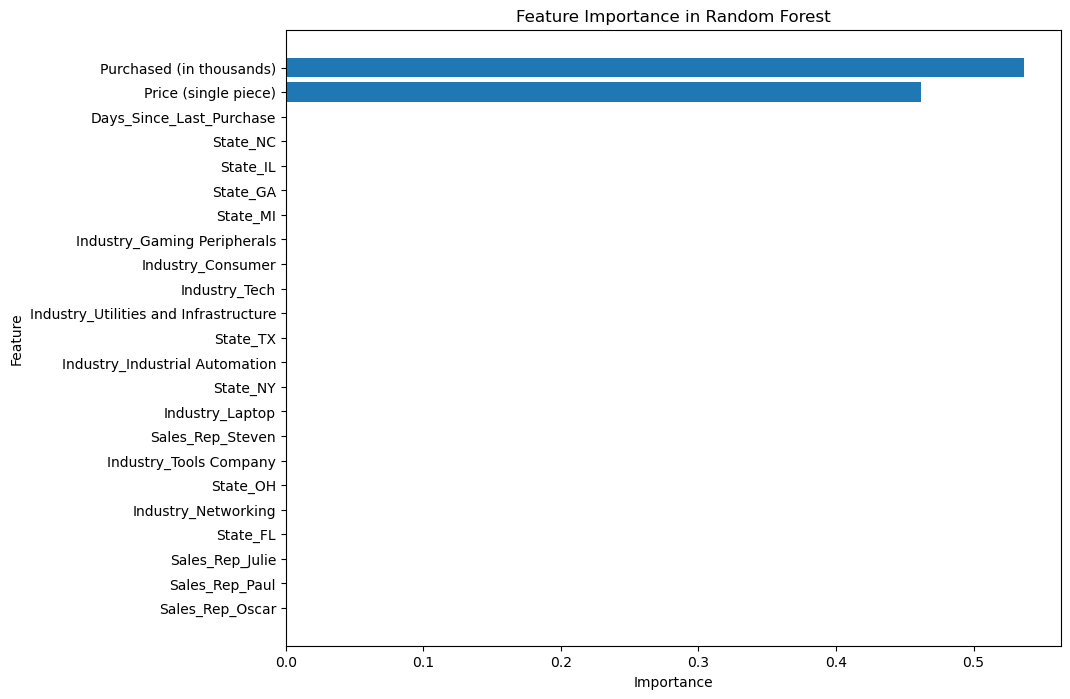

In [36]:
feature_importance = best_rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 
                                      'Importance': feature_importance
                                      })
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(10,8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.show()

Double confirm the feature importance by using Permutation Feature Importance (Measuring how the model's performance changes when that feature's values are randomly shuffled).

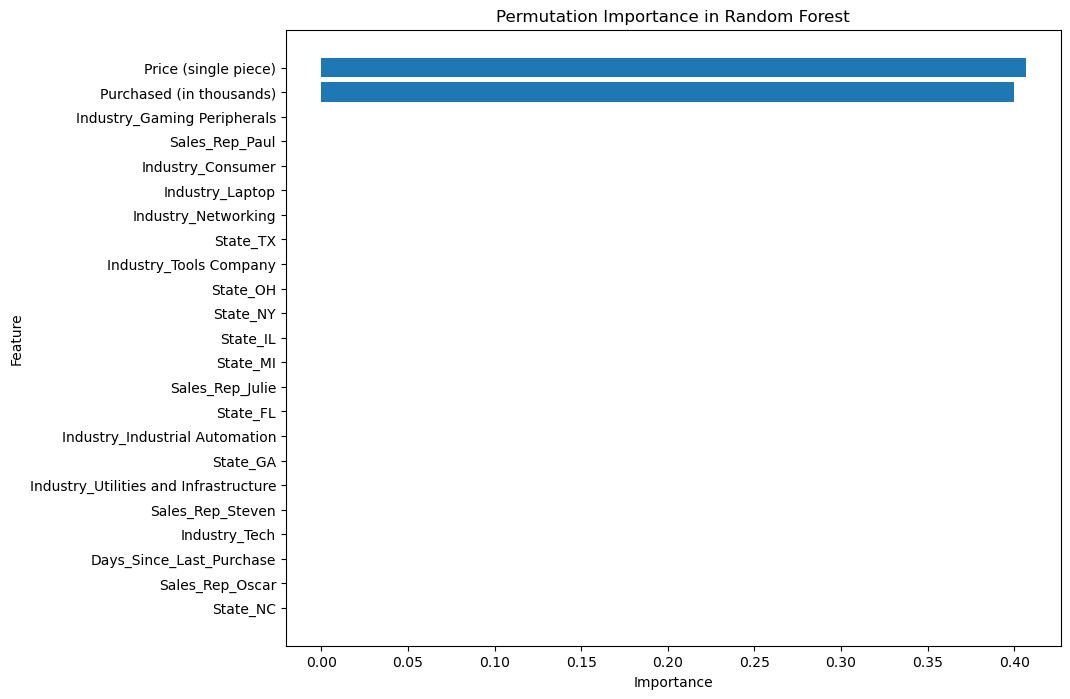

In [37]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(best_rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

perm_importance_df = pd.DataFrame({'Feature': X_train.columns, 
                                   'Importance': perm_importance.importances_mean
                                  }).sort_values('Importance', ascending=False)

#Viz it 
plt.figure(figsize=(10,8))  
plt.barh(perm_importance_df['Feature'], perm_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Permutation Importance in Random Forest')
plt.show()


Price and Purchased quantity is still the dominated features. <br>

## Build Simplified Model 

In [70]:
X_train_simple = X_train[['Purchased (in thousands)', 'Price (single piece)']]
X_test_simple = X_test[['Purchased (in thousands)', 'Price (single piece)']]

simple_rf = RandomForestClassifier(n_estimators=100, random_state=42)
simple_rf.fit(X_train_simple, y_train)

y_pred_simple = simple_rf.predict(X_test_simple)

print("Simplified Tunned RF Model",evaluate_model(simple_rf, X_test_simple, y_test)) 
print("Untuned RF Model",evaluate_model(RF, X_test, y_test))

Simplified Tunned RF Model {'Accuracy': 0.9954, 'Precision': 0.9954062961021823, 'Recall': 0.9954, 'F1 Score': 0.9954009121389117}
Untuned RF Model {'Accuracy': 0.9713, 'Precision': 0.9716505142417278, 'Recall': 0.9713, 'F1 Score': 0.9711695596234742}


presimplified Tuned Random Forest model performance:<br>'Accuracy': 0.9946, 'Precision': 0.9946099832627778, 'Recall': 0.9946, 'F1 Score': 0.9946026205301887<br>
simplified Random Forest model performance:<br> 'Accuracy': 0.9954, 'Precision': 0.9954062961021823, 'Recall': 0.9954, 'F1 Score': 0.9954009121389117

Start investigate why industry is not important, based on my domain knowledge, it should be important. 

## Deployment 


In [ ]:
import joblib
joblib.dump(RF,'customer_priority_model.pkl')

['customer_priority_model.joblib']

# Conclusion 

This project aimed to identify high-value customers for the sales team by developing a predictive model based on historical purchasing data. Through exploratory data analysis, we found that purchase quantity and price per piece were strongly correlated with revenue, making them key features in our model. In contrast, other features like industry, state, and sales rep showed minimal variation, limiting their predictive value.

The final model achieved strong performance, with an accuracy of 97% and an F1-score of 0.97, effectively distinguishing high-value customers. By ranking customers through priority scores, this model enables the sales team to focus efforts on high-revenue clients, ultimately supporting sales quota achievement, more strategic decision-making, and improved time management.

Despite the great prediction perfromance, there are limitation from lack of differentation in categorical distribution. Such as revenue's distribution across industries, customers, sales reps, and states showed minimal variation, which may limit the model's ability to leverage these features effectively and resulted in low feature importance.

Looking forward, periodic retraining with updated sales data and integrating the model into a CRM system could enhance real-time customer prioritization.
